<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Supervised Learning Model Comparison

_author The arbitrary and capricious heart of data science_

---

### Let us begin...

Recall the "data science process."
   1. Define the problem.
   2. Gather the data.
   3. Explore the data.
   4. Model the data.
   5. Evaluate the model.
   6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.
Most of the questions requiring a written response can be written in 2-3 sentences.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. When predicting `e401k`, you may use the entire dataframe if you wish.

### Step 2: Gather the data.

##### 1. Read in the data from the repository.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, \
plot_tree, export_text
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, AdaBoostRegressor,\
BaggingClassifier, BaggingRegressor, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score,\
f1_score

In [2]:
# Read 401ksubs dataset
df = pd.read_csv('401ksubs.csv')

In [3]:
# check # of row and column of raw data
print(f'Raw data in dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

Raw data in dataset has 9275 rows and 11 columns.


In [4]:
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [5]:
# Check missing value in the dataset
df.isnull().sum()[df.isnull().sum() != 0]

Series([], dtype: int64)

##### 2. What are 2-3 other variables that, if available, would be helpful to have?

In [6]:
# Date of hire, occupation
# 2 of this variable may help to predict the income.

##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

In [7]:
# Race is sensitive data and the people should have equally eligible. 

# Everyone should have eligible for both IRAs and 401(k)s if they reach minimum
# requirement.

## Step 3: Explore the data.

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

In [8]:
df.columns

Index(['e401k', 'inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k',
       'pira', 'incsq', 'agesq'],
      dtype='object')

In [9]:
# Feature that can be predictor for income
df[['marr', 'male', 'age', 'fsize', 'nettfa']].head(1)

,marr,male,age,fsize,nettfa
0,0,0,40,1,4.575


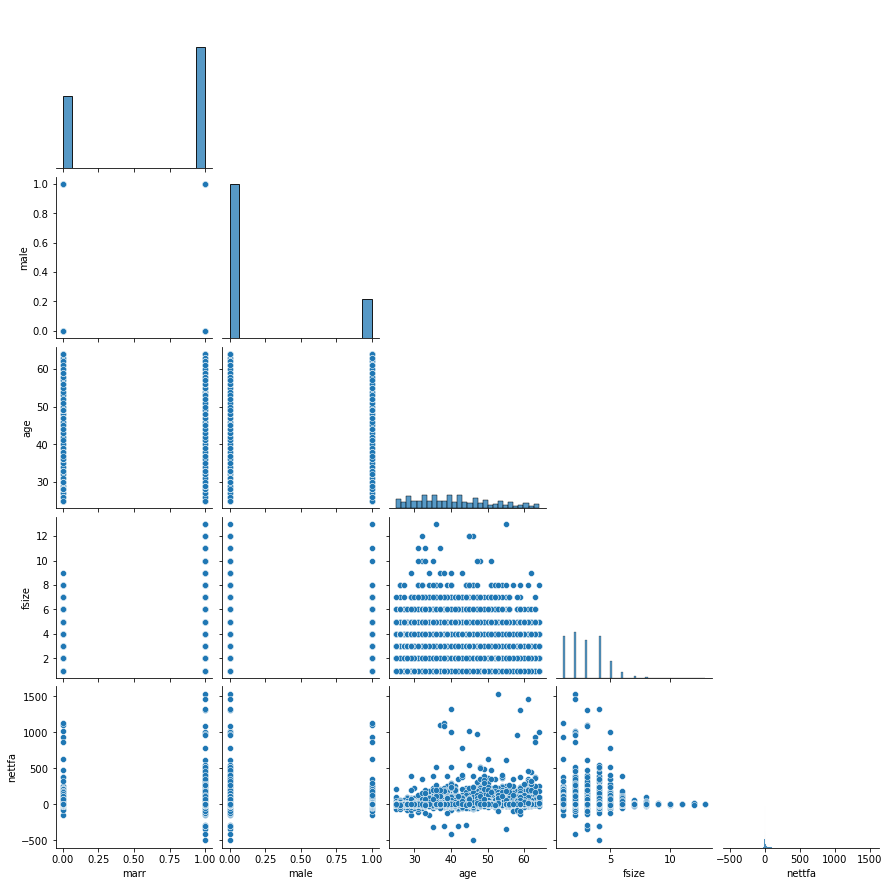

In [10]:
# Plot pairplot for exploring overall of the data 
sns.pairplot(df[['marr', 'male', 'age', 'fsize', 'nettfa']],corner=True);

In [11]:
# we shouldn't use feature

# Male feature: Just like race we can use it to predict the income. 
# Ethically, we should treat male and female equally.

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs might have done this!

In [12]:
# agesq and incsq
# Hypothesis: This two feature may use to predict the 401k eligible effectively.

##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

In [13]:
# Age and inc features have incorrect description.

# The correct desciption of age and inc features is age and inc 
# instead of age^2 and inc^2.

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

In [14]:
# Problem: What features best predict one's income?

# Linear regression 
# Decision tree regressor
# This 2 models are appropriate for this regression problem because 
# they have interpretability to finding the best feature to predict income.

# Random forest regressor
# k-Nearest Neighbor reggressor
# Bagging
# Boosting
# Stacking
# This 5 models aren't appropriate for this regression problem because 
# they don't have interpretability for answering the question.

##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [15]:
df.columns

Index(['e401k', 'inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k',
       'pira', 'incsq', 'agesq'],
      dtype='object')

In [16]:
# Setting X and y for predict income
# agesq may be useful feature for predicted income
X = df[['marr','age', 'fsize','nettfa','agesq']]
y = df['inc']

# Splitting the training and testing data
# X before y, train before test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42)

In [17]:
# Define function for both r2 score and rmse
def regressor_metrics(y_test, y_pred):
    """Function for find r2 score and rmse of regression model"""
    r2 = round(r2_score(y_test, y_pred),4)
    rmse = round(mean_squared_error(y_test, y_pred,squared=False),2)
    return [r2, rmse]

In [18]:
# Define metric function for both training and testing data
def train_test_regressor_metric(y_train, y_pred_train, y_test, y_pred_test):
    """Function for find r2 score and rmse of regression model for both training and testing set"""
    metric_train = regressor_metrics(y_train, y_pred_train)
    metric_test = regressor_metrics(y_test, y_pred_test)
    return metric_train + metric_test

In [19]:
def assign_to_df_regressor(model,score_df,y_train, y_pred_train, y_test, y_pred_test):
    """Function for assigning result of the model to score dataframe"""
    regression_metrics = train_test_regressor_metric(y_train, y_pred_train ,y_test, y_pred_test)
    model_df = pd.DataFrame([[model] + regression_metrics],
                           columns = ['Model', 'r2_train', 'rmse_train', 'r2_test', 'rmse_test' ])
    score_df = pd.concat([score_df,model_df])
    score_df.reset_index(drop=True, inplace=True)
    return score_df

In [20]:
# Define score dataframe
score_df = pd.DataFrame(columns = ['Model', 'r2_train', 'rmse_train', 'r2_test', 'rmse_test'])

In [21]:
# Model: Linear regression
# Instantiate
linreg = LinearRegression()

# Fit or train model
linreg.fit(X_train, y_train)

# Evaluation
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

# Assign result of the model to score dataframe 
score_df = assign_to_df_regressor('linreg',score_df,y_train, y_pred_train, y_test, y_pred_test)
score_df

,Model,r2_train,rmse_train,r2_test,rmse_test
0,linreg,0.2963,20.11,0.2581,21.03


In [22]:
# Model: kNN regressor
# Create pipeline
pipe_knnr = Pipeline([
    ('sc', StandardScaler()),
    ('knnr', KNeighborsRegressor())
])
# Fit or train model
pipe_knnr.fit(X_train, y_train)

# Evaluation
y_pred_train = pipe_knnr.predict(X_train)
y_pred_test = pipe_knnr.predict(X_test)

# Assign result of the model to score dataframe 
score_df = assign_to_df_regressor('knnr',score_df,y_train, y_pred_train, y_test, y_pred_test)
score_df

,Model,r2_train,rmse_train,r2_test,rmse_test
0,linreg,0.2963,20.11,0.2581,21.03
1,knnr,0.5343,16.36,0.3088,20.3


In [23]:
# Model: Decision tree regressor
# Instantiate
dtr = DecisionTreeRegressor()

# Fit or train
dtr.fit(X_train, y_train)

# Evaluation
y_pred_train = dtr.predict(X_train)
y_pred_test = dtr.predict(X_test)

# Assign result of the model to score dataframe 
score_df = assign_to_df_regressor('dtr',score_df,y_train, y_pred_train, y_test, y_pred_test)
score_df

,Model,r2_train,rmse_train,r2_test,rmse_test
0,linreg,0.2963,20.11,0.2581,21.03
1,knnr,0.5343,16.36,0.3088,20.3
2,dtr,0.9875,2.68,-0.2283,27.06


In [24]:
# Model: Bagging
# Instantiate
bagging_r = BaggingRegressor(random_state=42)

# Fit or train
bagging_r.fit(X_train, y_train)

# Evaluation
y_pred_train = bagging_r.predict(X_train)
y_pred_test = bagging_r.predict(X_test)

# Assign result of the model to score dataframe 
score_df = assign_to_df_regressor('baggingr',score_df,y_train, y_pred_train, y_test, y_pred_test)
score_df

,Model,r2_train,rmse_train,r2_test,rmse_test
0,linreg,0.2963,20.11,0.2581,21.03
1,knnr,0.5343,16.36,0.3088,20.3
2,dtr,0.9875,2.68,-0.2283,27.06
3,baggingr,0.8674,8.73,0.2265,21.48


In [25]:
# Model: Random forest regressor
# Instantiate
rfr = RandomForestRegressor(random_state=42)

# Fit or train
rfr.fit(X_train, y_train)

# Model evaluation
y_pred_train = rfr.predict(X_train)
y_pred_test = rfr.predict(X_test)

# Assign result of the model to score dataframe 
score_df = assign_to_df_regressor('rfr',score_df,y_train, y_pred_train, y_test, y_pred_test)
score_df
# Without tuning parameter of random forest: Overfitting

,Model,r2_train,rmse_train,r2_test,rmse_test
0,linreg,0.2963,20.11,0.2581,21.03
1,knnr,0.5343,16.36,0.3088,20.3
2,dtr,0.9875,2.68,-0.2283,27.06
3,baggingr,0.8674,8.73,0.2265,21.48
4,rfr,0.8938,7.81,0.2835,20.67


In [26]:
# Instantiate Adaboosting
ada = AdaBoostRegressor()

# Fit Gridsearch
ada.fit(X_train,y_train)

# Evaluation
y_pred_train = ada.predict(X_train)
y_pred_test = ada.predict(X_test)

# Assign result of the model to score dataframe 
score_df = assign_to_df_regressor('adar',score_df,y_train, y_pred_train, y_test, y_pred_test)
score_df

,Model,r2_train,rmse_train,r2_test,rmse_test
0,linreg,0.2963,20.11,0.2581,21.03
1,knnr,0.5343,16.36,0.3088,20.3
2,dtr,0.9875,2.68,-0.2283,27.06
3,baggingr,0.8674,8.73,0.2265,21.48
4,rfr,0.8938,7.81,0.2835,20.67
5,adar,0.0772,23.03,0.0323,24.02


##### 9. What is bootstrapping?

In [27]:
# Booststripping is subsample with replacement. 

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

In [28]:
# Decision tree is 1 tree model. 
# Set of bagged decision trees is many decision trees with bootstrapping the sample for each tree.

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

In [29]:
# Random forest is set of bagged decision trees with 
# subset of features for each tree in random forest.

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

In [30]:
# Random forest has more randomness which is subset feature, 
# this randomness may help model to reduce variance of the model.  

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

In [31]:
score_df

,Model,r2_train,rmse_train,r2_test,rmse_test
0,linreg,0.2963,20.11,0.2581,21.03
1,knnr,0.5343,16.36,0.3088,20.3
2,dtr,0.9875,2.68,-0.2283,27.06
3,baggingr,0.8674,8.73,0.2265,21.48
4,rfr,0.8938,7.81,0.2835,20.67
5,adar,0.0772,23.03,0.0323,24.02


##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

In [32]:
# The overfitting models are random forest, knn, bagging and random forest model.
# This models have large different between training rmse and testing rmse.

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

In [33]:
# I choose kNN because this model has the good rmse and r2 score for both training and testing.
# Moreover, kNN is lower variance than other tree regressor.

##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

In [34]:
# 1. Select new set of feature/Feature engineering
# 2. tuning hyperparameter of boosting model for improve accuracy of the model
# 3. Using better boosting model to improve the performance of the model e.g. XGboosting

In [35]:
# Using simple model to answer the problem: What features best predict one's income?
# Tuning decision tree regressor parameter

# Hyperparameter
dtr_params = {
    'max_depth': [n for n in range(4,11)],
}

# Instantiate gridsearchCV
grid_dtr = GridSearchCV(DecisionTreeRegressor(random_state=42), dtr_params, cv= 3)

# Fit or train
grid_dtr.fit(X_train, y_train)

# Evaluation
y_pred_train = grid_dtr.predict(X_train)
y_pred_test = grid_dtr.predict(X_test)
print(f'Best score: {grid_dtr.best_score_}')
print(grid_dtr.best_params_)

# Assign result of the model to score dataframe 
score_df = assign_to_df_regressor('dtr_tuning',score_df,y_train, y_pred_train, y_test, y_pred_test)
score_df

Best score: 0.3738828164427272
{'max_depth': 4}


,Model,r2_train,rmse_train,r2_test,rmse_test
0,linreg,0.2963,20.11,0.2581,21.03
1,knnr,0.5343,16.36,0.3088,20.3
2,dtr,0.9875,2.68,-0.2283,27.06
3,baggingr,0.8674,8.73,0.2265,21.48
4,rfr,0.8938,7.81,0.2835,20.67
5,adar,0.0772,23.03,0.0323,24.02
6,dtr_tuning,0.3991,18.59,0.3742,19.32


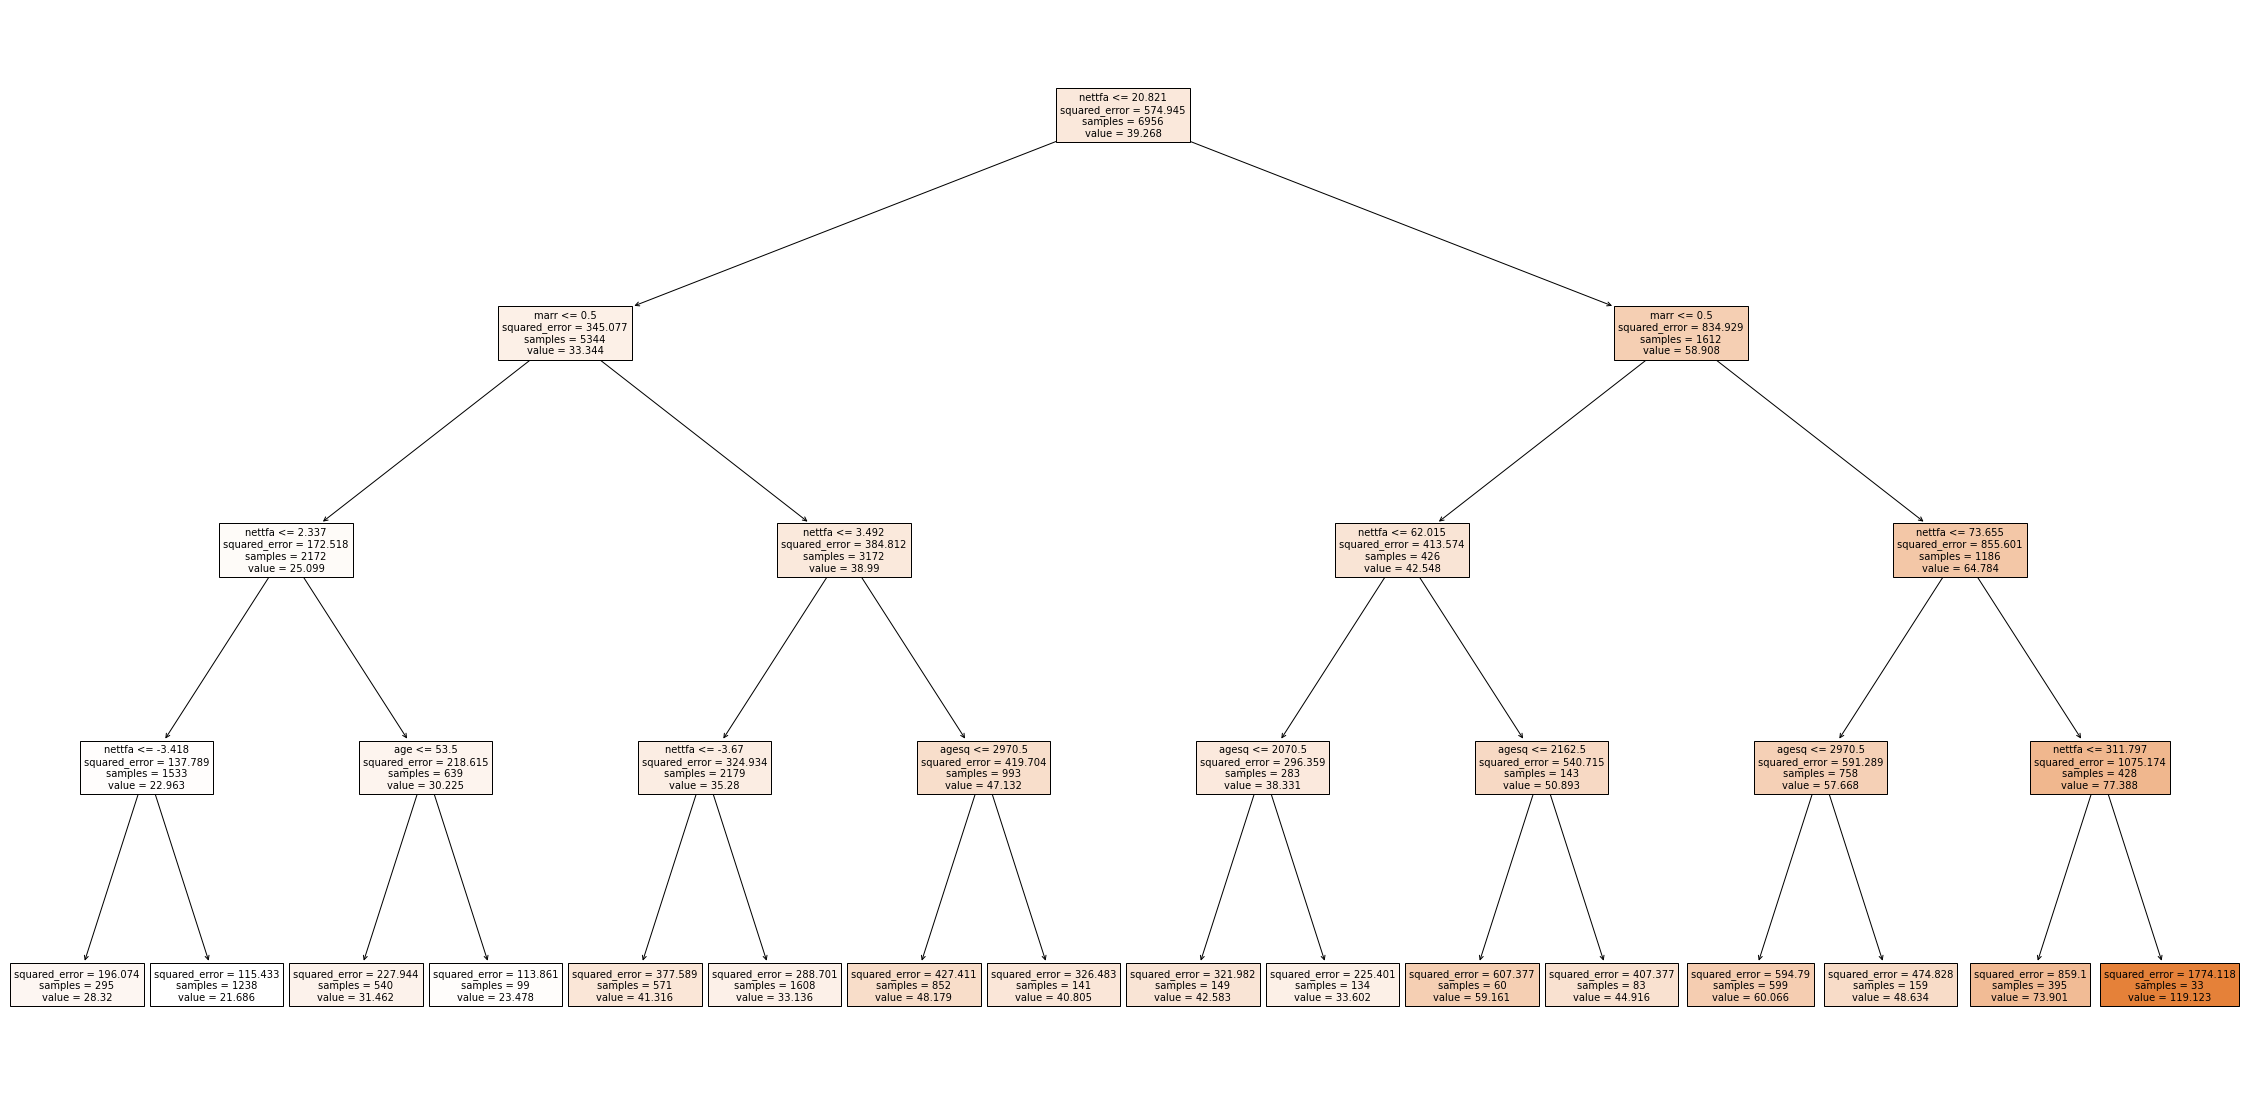

In [36]:
# Establish size of figure.
plt.figure(figsize = (40, 20))

# Plot our tree.
plot_tree(grid_dtr.best_estimator_, feature_names = X_train.columns,
          class_names = ['Income'], filled = True);

# What features best predict one's income?
# Answer: Root node of decision tree regressor is 'net total finiancial asset'

In [37]:
t0 = time.time()
# Tuning random forest hyperparameter
# Hyperparameter
rfr_params = {
    'max_depth': [n for n in range(4,11)],
}

# Instantiate gridsearchCV
grid_rfr = GridSearchCV(RandomForestRegressor(random_state=42), rfr_params, cv= 3)

# Fit or train
grid_rfr.fit(X_train, y_train)

# Evaluation
y_pred_train = grid_rfr.predict(X_train)
y_pred_test = grid_rfr.predict(X_test)
print(f'Best score: {grid_rfr.best_score_}')
print(grid_rfr.best_params_)

# Assign result of the model to score dataframe 
score_df = assign_to_df_regressor('rfr_tuning',score_df,y_train, y_pred_train, y_test, y_pred_test)
print(f'Calculation time: {round(time.time() - t0)} sec')
score_df
# R2 score is still low value.

Best score: 0.39993983721582776
{'max_depth': 6}
Calculation time: 7 sec


,Model,r2_train,rmse_train,r2_test,rmse_test
0,linreg,0.2963,20.11,0.2581,21.03
1,knnr,0.5343,16.36,0.3088,20.3
2,dtr,0.9875,2.68,-0.2283,27.06
3,baggingr,0.8674,8.73,0.2265,21.48
4,rfr,0.8938,7.81,0.2835,20.67
5,adar,0.0772,23.03,0.0323,24.02
6,dtr_tuning,0.3991,18.59,0.3742,19.32
7,rfr_tuning,0.4588,17.64,0.39,19.07


## Step 4: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

In [38]:
# High chance to occur dataleak in the model
# Dataleak is the model has the information that they shouldn't know.
# It will make the model predict the result correctly by using only this information

# In reality, we will not have p401k as predictor for predicting the eligible for 401k. 

##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

In [39]:
# Problem: Predict whether or not one is eligible for a 401k.

# Logistic regression
# k-Nearest-Neighbors classifier
# This 2 model may be appropreate model for this problem, if the model
# accuracy rate is acceptable and we have contraint about time

# Decision tree classsifier
# Random forest classifier
# Bagging
# Boosting
# Stacking
# This 5 model may be better model for this problem because they can predict
# the result with high accuracy.

##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [40]:
df.columns

Index(['e401k', 'inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k',
       'pira', 'incsq', 'agesq'],
      dtype='object')

In [41]:
# Set X and y for classification problem
X = df.drop(columns = ['e401k','p401k'])
y = df['e401k']

# Split train and test data: train before test, X before y
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42 )

In [42]:
# Define score_class_df for store the classification model score
score_class_df = pd.DataFrame(columns=['model','accuracy_train', 'recall_train', 'precision_train', 
                                       'accuracy_test', 'recall_test', 'precision_test'])

In [43]:
# Define function for accuracy, recall and precision
def classification_metrics(y_test, y_pred):
    """Function for find accuracy, precision and recall of classification model"""
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy = round(accuracy_score(y_test, y_pred),4)
    recall = round(tp/(tp+fn),4)
    precision = round(tp/(tp+fp),4)
    return [accuracy, recall, precision]

In [44]:
# Define metric function for both training and testing data
def train_test_classification_metric(y_train, y_pred_train, y_test, y_pred_test):
    """Function for find metrics for both training and testing set"""
    metric_train = classification_metrics(y_train, y_pred_train)
    metric_test = classification_metrics(y_test, y_pred_test)
    return metric_train + metric_test

In [45]:
def assign_to_df_classifier(model,score_df,y_train, y_pred_train, y_test, y_pred_test):
    """Function assigning result of the model to score dataframe including show the confusion matrix"""
    class_metrics = train_test_classification_metric(y_train, y_pred_train ,y_test, y_pred_test)
    model_df = pd.DataFrame([[model]+class_metrics],
                          columns=['model','accuracy_train', 'recall_train', 'precision_train', 
                                           'accuracy_test', 'recall_test', 'precision_test'])
    score_df = pd.concat([score_df,model_df])
    score_df.reset_index(drop=True,inplace=True)
    # Show confusion matrix
    print(confusion_matrix(y_test,y_pred_test))
    return score_df

In [46]:
# Model: Logistic regression
# Create pipeline
pipe_log = Pipeline([
    ('sc',StandardScaler()),
    ('logreg',LogisticRegression())
])

# Fit and train
pipe_log.fit(X_train,y_train)

# Evaluation
y_pred_train = pipe_log.predict(X_train)
y_pred_test = pipe_log.predict(X_test)

# Assign result of the model to score dataframe
score_class_df = assign_to_df_classifier('logreg',score_class_df,y_train, y_pred_train, y_test, y_pred_test)
score_class_df

[[1163  259]
 [ 541  356]]


,model,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test
0,logreg,0.657,0.4055,0.5948,0.655,0.3969,0.5789


In [47]:
# Model: kNN classifier
# Create pipeline
pipe_knnc = Pipeline([
    ('sc', StandardScaler()),
    ('knnc', KNeighborsClassifier())
])
# Fit or train
pipe_knnc.fit(X_train, y_train)

# Evaluation
y_pred_train = pipe_knnc.predict(X_train)
y_pred_test = pipe_knnc.predict(X_test)

# Assign result of the model to score dataframe
score_class_df = assign_to_df_classifier('knnc',score_class_df,y_train, y_pred_train, y_test, y_pred_test)
score_class_df

[[1068  354]
 [ 481  416]]


,model,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test
0,logreg,0.657,0.4055,0.5948,0.655,0.3969,0.5789
1,knnc,0.7516,0.6088,0.7177,0.6399,0.4638,0.5403


In [48]:
# Model: Decision tree classifier
# Instantiate
dtc = DecisionTreeClassifier()
# Fit or train
dtc.fit(X_train, y_train)

# Evaluation
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

# Assign result of the model to score dataframe
score_class_df = assign_to_df_classifier('dtc',score_class_df,y_train, y_pred_train, y_test, y_pred_test)
score_class_df

[[943 479]
 [470 427]]


,model,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test
0,logreg,0.657,0.4055,0.5948,0.655,0.3969,0.5789
1,knnc,0.7516,0.6088,0.7177,0.6399,0.4638,0.5403
2,dtc,1.0,1.0,1.0,0.5908,0.476,0.4713


In [49]:
# Model: Random forest classifier
# Instantiate
rfc = RandomForestClassifier(random_state=42)
# Fit or train
rfc.fit(X_train, y_train)

# Evaluation
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

# Assign result of the model to score dataframe
score_class_df = assign_to_df_classifier('rfc',score_class_df,y_train, y_pred_train, y_test, y_pred_test)
score_class_df

[[1106  316]
 [ 468  429]]


,model,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test
0,logreg,0.657,0.4055,0.5948,0.655,0.3969,0.5789
1,knnc,0.7516,0.6088,0.7177,0.6399,0.4638,0.5403
2,dtc,1.0,1.0,1.0,0.5908,0.476,0.4713
3,rfc,1.0,1.0,1.0,0.6619,0.4783,0.5758


In [50]:
# Model: Bagging classifier
# Instantiate
bagging_c = BaggingClassifier(random_state=42)
# Fit or train
bagging_c.fit(X_train, y_train)

# Evaluation
y_pred_train = bagging_c.predict(X_train)
y_pred_test = bagging_c.predict(X_test)

# Assign result of the model to score dataframe
score_class_df = assign_to_df_classifier('baggingc',score_class_df,y_train, y_pred_train, y_test, y_pred_test)
score_class_df

[[1117  305]
 [ 512  385]]


,model,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test
0,logreg,0.657,0.4055,0.5948,0.655,0.3969,0.5789
1,knnc,0.7516,0.6088,0.7177,0.6399,0.4638,0.5403
2,dtc,1.0,1.0,1.0,0.5908,0.476,0.4713
3,rfc,1.0,1.0,1.0,0.6619,0.4783,0.5758
4,baggingc,0.975,0.9478,0.9882,0.6477,0.4292,0.558


In [51]:
# Model: Adaboosting classifier
# Instantiate
adac = AdaBoostClassifier()
# Fit or train
adac.fit(X_train, y_train)

# Evaluation
y_pred_train = adac.predict(X_train)
y_pred_test = adac.predict(X_test)

# Assign result of the model to score dataframe
score_class_df = assign_to_df_classifier('adac',score_class_df,y_train, y_pred_train, y_test, y_pred_test)
score_class_df

[[1135  287]
 [ 442  455]]


,model,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test
0,logreg,0.657,0.4055,0.5948,0.655,0.3969,0.5789
1,knnc,0.7516,0.6088,0.7177,0.6399,0.4638,0.5403
2,dtc,1.0,1.0,1.0,0.5908,0.476,0.4713
3,rfc,1.0,1.0,1.0,0.6619,0.4783,0.5758
4,baggingc,0.975,0.9478,0.9882,0.6477,0.4292,0.558
5,adac,0.6928,0.515,0.6359,0.6856,0.5072,0.6132


## Step 5: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

In [52]:
# False positives: The person who doesn't has eligible for a 401(k) will be told that they have
# eligible for 401(k).

# False negatives: The person who has eligible for a 401(k) will be told that they don't have
# eligible for 401(k).

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

In [53]:
# In this case, I choose to minimize false negative because they'll lose eligible for 401(k).

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

In [54]:
# In order to minimize false negative, we need to optimize recall.

##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

In [55]:
# Because f1-score is the metric that optimize both false negative and false positive equally.

##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

In [56]:
# F1 score = 2*(precision*recall)/(precision+recall)
# Training F1 score
def f1_dataframe(score_class_df):
    """Function calculate f1 score for classification DataFrame"""
    precision_train = score_class_df['precision_train']
    recall_train = score_class_df['recall_train']
    score_class_df['f1_train'] = 2*(precision_train*recall_train)/(precision_train+recall_train)
    score_class_df['f1_train'] = score_class_df['f1_train'].astype('float64').round(4)
    # Testing F1 score
    precision_test = score_class_df['precision_test']
    recall_test = score_class_df['recall_test']
    score_class_df['f1_test'] = 2*(precision_test*recall_test)/(precision_test+recall_test)
    score_class_df['f1_test'] = score_class_df['f1_test'].astype('float64').round(4)
    return score_class_df

In [57]:
score_class_df = f1_dataframe(score_class_df)
score_class_df

,model,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test,f1_train,f1_test
0,logreg,0.657,0.4055,0.5948,0.655,0.3969,0.5789,0.4822,0.4709
1,knnc,0.7516,0.6088,0.7177,0.6399,0.4638,0.5403,0.6588,0.4991
2,dtc,1.0,1.0,1.0,0.5908,0.476,0.4713,1.0000,0.4736
3,rfc,1.0,1.0,1.0,0.6619,0.4783,0.5758,1.0000,0.5225
4,baggingc,0.975,0.9478,0.9882,0.6477,0.4292,0.558,0.9676,0.4852
5,adac,0.6928,0.515,0.6359,0.6856,0.5072,0.6132,0.5691,0.5552


##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

In [58]:
# Decision tree, random forest and bagging are overfitting 
# because training f1 score is much higher than testing f1 score.

##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

In [59]:
# I decided to choose model which has the best train and test accuracy model. 
# So, I choose adaboost classifier model.
# This model has good accuracy and f1 score for both training and testing.
# Moreover, this model doesn't overfitting like tree model.

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

In [60]:
# Just like the answer in the regressor part
# 1. Select new set of feature/Feature engineering
# 2. tuning hyperparameter of boosting model for improve accuracy of the model
# 3. Using better boosting model to improve the performance of the model e.g. XGboosting

In [61]:
t0 = time.time()

# Model: Tuning Random forest classifier
# Set hyperparameter for random forest classifier
dtc_params = {
    'max_depth': [n for n in range(3,9)],
    'min_samples_leaf':[1,3,5]
}

# Instantitate gridsearchCV
grid_dtc = GridSearchCV(DecisionTreeClassifier(), dtc_params, cv=3)

# Fit or train the model
grid_dtc.fit(X_train,y_train)

# Evaluation
y_pred_train = grid_dtc.predict(X_train)
y_pred_test = grid_dtc.predict(X_test)

# Print best score and parameter from gridsearchCV
print(f'Best score: {grid_dtc.best_score_}')
print(f'Best hyperparameter: {grid_dtc.best_params_}')

# Assign result of the model to score dataframe
score_class_df = assign_to_df_classifier('dtc_tuning',score_class_df,y_train, y_pred_train, y_test, y_pred_test)

# Calculate f1 score in DataFrame
score_class_df = f1_dataframe(score_class_df)
print(f'Calculation time: {round(time.time() - t0)} sec')
score_class_df

Best score: 0.6812796665526916
Best hyperparameter: {'max_depth': 5, 'min_samples_leaf': 1}
[[1082  340]
 [ 388  509]]
Calculation time: 1 sec


,model,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test,f1_train,f1_test
0,logreg,0.657,0.4055,0.5948,0.655,0.3969,0.5789,0.4822,0.4709
1,knnc,0.7516,0.6088,0.7177,0.6399,0.4638,0.5403,0.6588,0.4991
2,dtc,1.0,1.0,1.0,0.5908,0.476,0.4713,1.0000,0.4736
3,rfc,1.0,1.0,1.0,0.6619,0.4783,0.5758,1.0000,0.5225
4,baggingc,0.975,0.9478,0.9882,0.6477,0.4292,0.558,0.9676,0.4852
5,adac,0.6928,0.515,0.6359,0.6856,0.5072,0.6132,0.5691,0.5552
6,dtc_tuning,0.6994,0.5781,0.6288,0.6861,0.5674,0.5995,0.6024,0.5830


In [62]:
t0 = time.time()

# Model: Tuning Random forest classifier
# Set hyperparameter for random forest classifier
rfc_params = {
    'max_depth': [n for n in range(5,9)],
    'n_estimators': [100,150,200],
}

# Instantitate gridsearchCV
grid_rfc = GridSearchCV(RandomForestClassifier(random_state=42), rfc_params, cv=3)

# Fit or train the model
grid_rfc.fit(X_train,y_train)

# Evaluation
y_pred_train = grid_rfc.predict(X_train)
y_pred_test = grid_rfc.predict(X_test)

# Print best score and parameter from gridsearchCV
print(f'Best score: {grid_rfc.best_score_}')
print(f'Best hyperparameter: {grid_rfc.best_params_}')

# Assign result of the model to score dataframe
score_class_df = assign_to_df_classifier('rfc_tuning',score_class_df,y_train, y_pred_train, y_test, y_pred_test)

# Calculate f1 score in DataFrame
score_class_df = f1_dataframe(score_class_df)
print(f'Calculation time: {round(time.time() - t0)} sec')
score_class_df

Best score: 0.6874637161620073
Best hyperparameter: {'max_depth': 8, 'n_estimators': 150}
[[1165  257]
 [ 455  442]]
Calculation time: 16 sec


,model,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test,f1_train,f1_test
0,logreg,0.657,0.4055,0.5948,0.655,0.3969,0.5789,0.4822,0.4709
1,knnc,0.7516,0.6088,0.7177,0.6399,0.4638,0.5403,0.6588,0.4991
2,dtc,1.0,1.0,1.0,0.5908,0.476,0.4713,1.0000,0.4736
3,rfc,1.0,1.0,1.0,0.6619,0.4783,0.5758,1.0000,0.5225
4,baggingc,0.975,0.9478,0.9882,0.6477,0.4292,0.558,0.9676,0.4852
5,adac,0.6928,0.515,0.6359,0.6856,0.5072,0.6132,0.5691,0.5552
6,dtc_tuning,0.6994,0.5781,0.6288,0.6861,0.5674,0.5995,0.6024,0.5830
7,rfc_tuning,0.7468,0.5723,0.7269,0.693,0.4928,0.6323,0.6404,0.5539


In [63]:
t0 = time.time()
# Model: Tuning Adaboost classifier
ada = AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42),
                         random_state=42)
ada_params = {
    'base_estimator__max_depth':[2,3,4],
    'learning_rate': [0.1]
}
# Instantiate gridsearchCV
grid_ada = GridSearchCV(ada, ada_params,cv=3)

# Fit or train 
grid_ada.fit(X_train,y_train)

# Evaluation
y_pred_train = grid_ada.predict(X_train)
y_pred_test = grid_ada.predict(X_test)

# Print best score and parameter from gridsearchCV
print(f'Best score: {round(grid_ada.best_score_,4)}')
print(f'Best hyperparameter: {grid_ada.best_params_}')

# Assign result of the model to score dataframe
score_class_df = assign_to_df_classifier('adac_tuning',score_class_df,y_train, y_pred_train, y_test, y_pred_test)

# Calculate f1 score in DataFrame
score_class_df = f1_dataframe(score_class_df)
print(f'Calculation time: {round(time.time() - t0)} sec')
score_class_df

Best score: 0.6872
Best hyperparameter: {'base_estimator__max_depth': 4, 'learning_rate': 0.1}
[[1160  262]
 [ 456  441]]
Calculation time: 111 sec


,model,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test,f1_train,f1_test
0,logreg,0.657,0.4055,0.5948,0.655,0.3969,0.5789,0.4822,0.4709
1,knnc,0.7516,0.6088,0.7177,0.6399,0.4638,0.5403,0.6588,0.4991
2,dtc,1.0,1.0,1.0,0.5908,0.476,0.4713,1.0000,0.4736
3,rfc,1.0,1.0,1.0,0.6619,0.4783,0.5758,1.0000,0.5225
4,baggingc,0.975,0.9478,0.9882,0.6477,0.4292,0.558,0.9676,0.4852
5,adac,0.6928,0.515,0.6359,0.6856,0.5072,0.6132,0.5691,0.5552
6,dtc_tuning,0.6994,0.5781,0.6288,0.6861,0.5674,0.5995,0.6024,0.5830
7,rfc_tuning,0.7468,0.5723,0.7269,0.693,0.4928,0.6323,0.6404,0.5539
8,adac_tuning,0.7069,0.5117,0.6667,0.6904,0.4916,0.6273,0.5790,0.5512


## Step 6: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

In [64]:
# Regression: What features best predict one's income?
regressor_feature = df[['marr','age', 'fsize','nettfa','agesq']].columns
print(export_text(grid_dtr.best_estimator_, feature_names=list(regressor_feature)))

# The answer is loot node of tuning decision tree regressor which is nettfa feature.
# The limitation: This regressor model has low r2 score, this result may be not accuracy.

|--- nettfa <= 20.82
|   |--- marr <= 0.50
|   |   |--- nettfa <= 2.34
|   |   |   |--- nettfa <= -3.42
|   |   |   |   |--- value: [28.32]
|   |   |   |--- nettfa >  -3.42
|   |   |   |   |--- value: [21.69]
|   |   |--- nettfa >  2.34
|   |   |   |--- age <= 53.50
|   |   |   |   |--- value: [31.46]
|   |   |   |--- age >  53.50
|   |   |   |   |--- value: [23.48]
|   |--- marr >  0.50
|   |   |--- nettfa <= 3.49
|   |   |   |--- nettfa <= -3.67
|   |   |   |   |--- value: [41.32]
|   |   |   |--- nettfa >  -3.67
|   |   |   |   |--- value: [33.14]
|   |   |--- nettfa >  3.49
|   |   |   |--- agesq <= 2970.50
|   |   |   |   |--- value: [48.18]
|   |   |   |--- agesq >  2970.50
|   |   |   |   |--- value: [40.81]
|--- nettfa >  20.82
|   |--- marr <= 0.50
|   |   |--- nettfa <= 62.01
|   |   |   |--- agesq <= 2070.50
|   |   |   |   |--- value: [42.58]
|   |   |   |--- agesq >  2070.50
|   |   |   |   |--- value: [33.60]
|   |   |--- nettfa >  62.01
|   |   |   |--- agesq <= 2162.50


In [65]:
# Classification: Predict whether or not one is eligible for a 401k.
score_class_df[score_class_df['model'] == 'rfc_tuning']
# The best model for classification eligible for 401k is random forest with tuning hyperparameter.
# The random forest model provide accuracy similar to adaboosting with less calculation times.

,model,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test,f1_train,f1_test
7,rfc_tuning,0.7468,0.5723,0.7269,0.693,0.4928,0.6323,0.6404,0.5539
